# Kết nối với Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import thư viện

In [7]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Chuẩn bị dữ liệu

Kiểm tra bộ dữ liệu

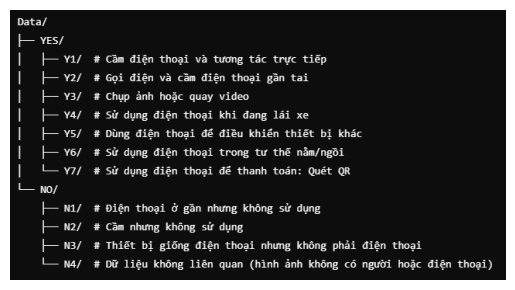

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/drive/MyDrive/PhoneAlert/data_tree.png'
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [2]:
import os

def count_files_in_Y_N(root_directory):
    # Đường dẫn đến các thư mục YES và NO
    directories_to_check = ['YES', 'NO']
    
    for dir_name in directories_to_check:
        dir_path = os.path.join(root_directory, dir_name)
        num_files = sum(len(files) for _, _, files in os.walk(dir_path))
        print(f"Thư mục: {dir_name} - Số lượng file: {num_files}")
 
data_path = 'C:\\Users\\HungN\\OneDrive\\Desktop\\PhoneAlert\\data'
count_files_in_Y_N(data_path)

Thư mục: YES - Số lượng file: 1267
Thư mục: NO - Số lượng file: 645


In [ ]:
data_path = "/content/drive/MyDrive/PhoneAlert/data"

def count_files_in_Y_N_subfolders(root_directory):
    subfolders_Y = [f'Y{i}' for i in range(1, 8)]  # Y1 đến Y7
    subfolders_N = [f'N{i}' for i in range(1, 5)]   # N1 đến N4

    file_counts = {}
        
    for subfolder in subfolders_Y + subfolders_N:
        dir_path = os.path.join(root_directory, subfolder)
        if os.path.exists(dir_path):
            num_files = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))])
            file_counts[subfolder] = num_files
        else:
            file_counts[subfolder] = 0  # Nếu thư mục không tồn tại

    return file_counts

file_counts = count_files_in_Y_N_subfolders(data_path)

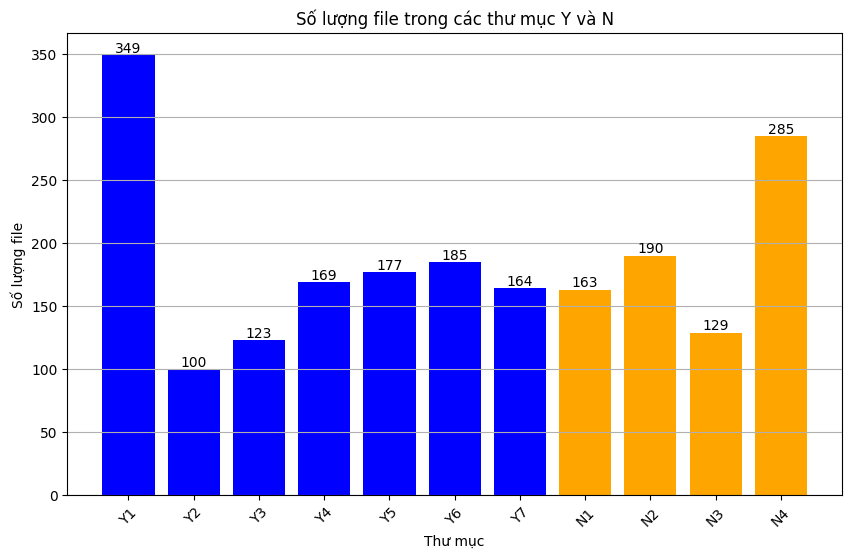

In [24]:
folders = list(file_counts.keys())
counts = list(file_counts.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(folders, counts, color=['blue' if f.startswith('Y') else 'orange' for f in folders])
plt.xlabel('Thư mục')
plt.ylabel('Số lượng file')
plt.title('Số lượng file trong các thư mục Y và N')
plt.xticks(rotation=45)
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

Tăng cường dữ liệu

In [14]:
import shutil

source_path = "/content/drive/MyDrive/PhoneAlert/data"
train_path = "/content/drive/MyDrive/PhoneAlert/train"
test_path = "/content/drive/MyDrive/PhoneAlert/test"

os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

In [ ]:
yes_folders = ['Y1', 'Y2', 'Y3', 'Y4', 'Y5', 'Y5', 'Y6', 'Y7']
no_folders = ['N1', 'N2', 'N3', 'N5']

# Tạo thư mục con yes và no trong thư mục train và test
yes_train_dir = os.path.join(train_path, 'yes')
yes_test_dir = os.path.join(test_path, 'yes')
no_train_dir = os.path.join(train_path, 'no')
no_test_dir = os.path.join(test_path, 'no')
os.makedirs(yes_train_dir, exist_ok=True)
os.makedirs(yes_test_dir, exist_ok=True)
os.makedirs(no_train_dir, exist_ok=True)
os.makedirs(no_test_dir, exist_ok=True)

def split_and_copy(class_dir, train_class_dir, test_class_dir):
    images = os.listdir(class_dir)
    images = [img for img in images if os.path.isfile(os.path.join(class_dir, img))]

    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    for img in train_images:
        src_img_path = os.path.join(class_dir, img)
        dst_img_path = os.path.join(train_class_dir, img)
        shutil.copy2(src_img_path, dst_img_path)

    for img in test_images:
        src_img_path = os.path.join(class_dir, img)
        dst_img_path = os.path.join(test_class_dir, img)
        shutil.copy2(src_img_path, dst_img_path)

for class_name in yes_folders:
    class_dir = os.path.join(source_path, class_name)
    if os.path.isdir(class_dir):
        split_and_copy(class_dir, yes_train_dir, yes_test_dir)

for class_name in no_folders:
  class_dir = os.path.join(source_path, class_name)
  if os.path.isdir(class_dir):
      split_and_copy(class_dir, no_train_dir, no_test_dir)

print("Phân chia 80-20")

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
)

train_dir = '/content/drive/MyDrive/PhoneAlert/train'
test_dir = '/content/drive/MyDrive/PhoneAlert/test'

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary'
)

Found 1289 images belonging to 2 classes.
Found 329 images belonging to 2 classes.


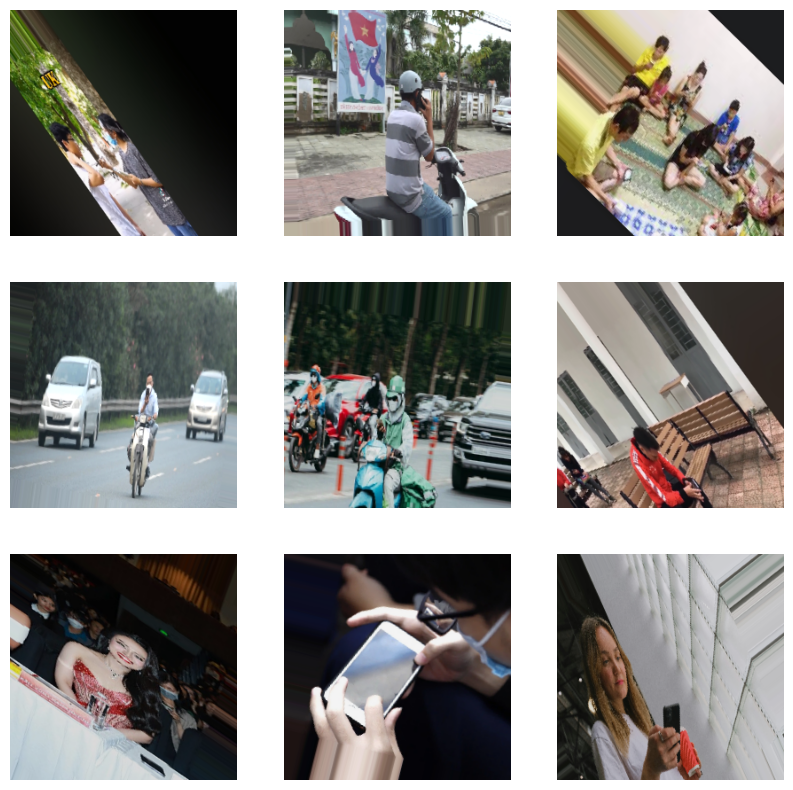

In [17]:
# Hiển thị một số hình ảnh đã được tăng cường
sample_images, _ = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.axis('off')
plt.show()

In [45]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (32, 256, 256, 3)
labels batch shape: (32,)


In [46]:
from keras import models
from keras import layers
from tensorflow.keras.layers import Dropout

PhoneAlert = models.Sequential()
PhoneAlert.add(layers.Conv2D(32, (3, 3), activation='relu', name='Layer_1', input_shape=(256, 256, 3)))
PhoneAlert.add(layers.MaxPooling2D((2, 2)))
PhoneAlert.add(layers.Conv2D(128, (3, 3), activation='relu', name='Layer_2'))
PhoneAlert.add(layers.MaxPooling2D((2, 2)))
PhoneAlert.add(layers.Conv2D(128, (3, 3), activation='relu', name='Layer_3'))
PhoneAlert.add(layers.MaxPooling2D((2, 2)))
PhoneAlert.add(layers.Conv2D(64, (3, 3), activation='relu', name='Layer_4'))
PhoneAlert.add(layers.MaxPooling2D((2, 2)))
PhoneAlert.add(layers.Flatten())
PhoneAlert.add(layers.Dense(512, activation='relu'))
PhoneAlert.add(Dropout(0.4))

PhoneAlert.add(layers.Dense(1, activation='sigmoid'))

PhoneAlert.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Layer_1 (Conv2D)                     │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_2 (Conv2D)                     │ (None, 125, 125, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_3 (Conv2D)                     │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_4 (Conv2D)                     │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,682,817 (25.49 MB)

 Trainable params: 6,682,817 (25.49 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
!nvidia-smi

Mon Nov 11 10:17:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0              26W /  70W |    239MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [48]:
import tensorflow as tf

print("Thiết bị hiện có:", tf.config.list_physical_devices('GPU'))

with tf.device('/GPU:0'):
    print("Đang sử dụng GPU")

Thiết bị hiện có: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Đang sử dụng GPU


In [49]:
PhoneAlert.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [50]:
history_DA = PhoneAlert.fit(
    train_generator,
    epochs=10,
    verbose=1
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.6590 - loss: 0.8685
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.7222 - loss: 0.6152
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7173 - loss: 0.5969
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7040 - loss: 0.6096
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7183 - loss: 0.5899
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.6913 - loss: 0.6008
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 82s 958ms/step - accuracy: 0.7137 - loss: 0.5859
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.6961 - loss: 0.5817
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 49s 946ms/step - accuracy: 0.7091 - loss: 0.5940
Epoch 10/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 50s 998ms/step - accuracy: 0.7097 - loss: 0.5748


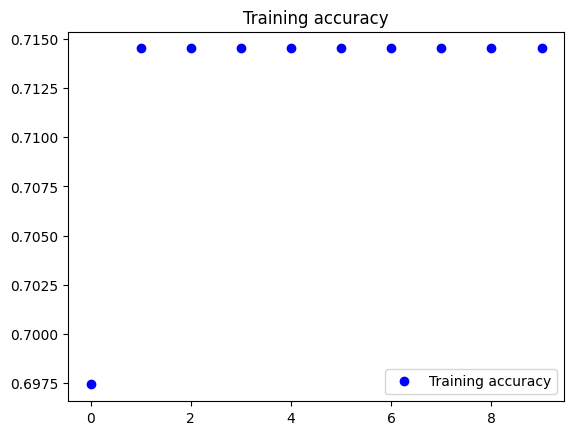

In [52]:
acc = history_DA.history['accuracy']
#val_acc = history_DA.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training accuracy')
plt.legend()

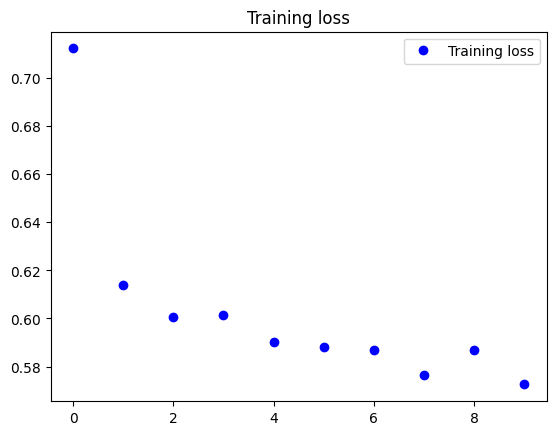

In [54]:
loss = history_DA.history['loss']
#val_loss = history_DA.history['val_loss']

plt.plot(epochs, loss, 'bo', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [55]:
PhoneAlert.save("/content/drive/MyDrive/PhoneAlert/PhoneAlert.h5")

In [56]:
test_loss, test_accuracy = PhoneAlert.evaluate(test_generator)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.7431 - loss: 0.5547
Test Loss: 0.5782204270362854
Test Accuracy: 0.7203647494316101


In [18]:
from tensorflow import keras

model_path = "/content/drive/MyDrive/PhoneAlert/PhoneAlert.h5"

PhoneAlert = keras.models.load_model(model_path)

PhoneAlert.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Layer_1 (Conv2D)                     │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_2 (Conv2D)                     │ (None, 125, 125, 128)       │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_3 (Conv2D)                     │ (None, 60, 60, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Layer_4 (Conv2D)                     │ (None, 28, 28, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,682,819 (25.49 MB)

 Trainable params: 6,682,817 (25.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


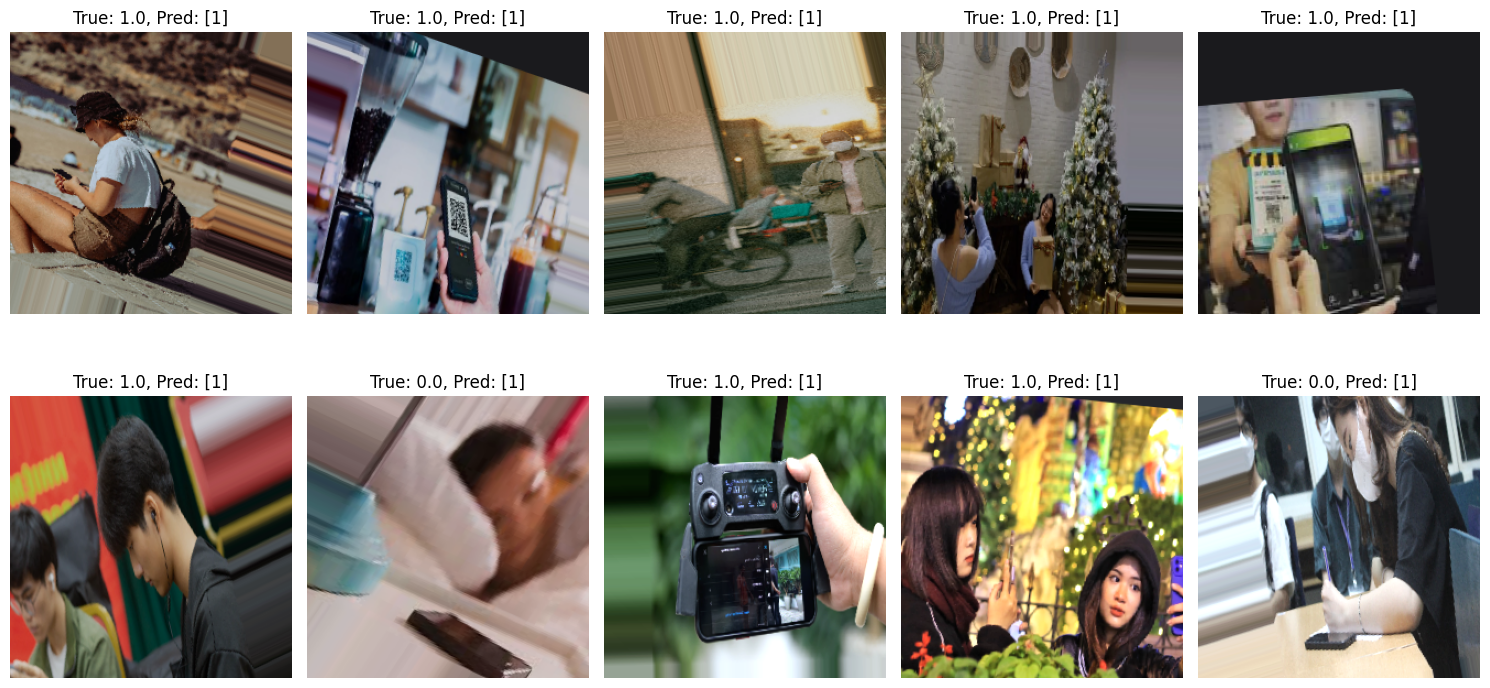

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Lấy một batch dữ liệu từ test_generator
X_test, y_test = next(test_generator)  # Lấy batch đầu tiên
n_images = 10  # Số lượng ảnh muốn hiển thị

# Dự đoán cho batch này
predictions = PhoneAlert.predict(X_test)
predicted_classes = np.where(predictions > 0.5, 1, 0)  # Chuyển đổi xác suất thành nhãn (0 hoặc 1)

# Chọn ngẫu nhiên 10 ảnh
indices = np.random.choice(X_test.shape[0], size=n_images, replace=False)

# Vẽ ảnh và nhãn
plt.figure(figsize=(15, 8))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])  # Hiển thị ảnh
    plt.title(f'True: {y_test[idx]}, Pred: {predicted_classes[idx]}')  # Hiển thị nhãn thực và dự đoán
    plt.axis('off')  # Ẩn trục

plt.tight_layout()
plt.show()

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Đường dẫn tới thư mục chứa ảnh
folder_path = '..............'

# Chọn ngẫu nhiên 10 ảnh từ thư mục
all_images = os.listdir(folder_path)
selected_images = random.sample(all_images, 10)

plt.figure(figsize=(15, 6))
rows, cols = 2, 5

# Lặp qua từng ảnh đã chọn, tiền xử lý và dự đoán
for i, image_name in enumerate(selected_images):
    image_path = os.path.join(folder_path, image_name)

    # Tiền xử lý ảnh
    img = load_img(image_path, target_size=(256, 256))  # Đảm bảo kích thước
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Thêm batch dimension
    img_array = img_array / 255.0  # Rescale giá trị pixel

    # Dự đoán với mô hình PhoneAlert
    prediction = PhoneAlert.predict(img_array)

    # Nhận định dựa trên kết quả dự đoán
    result = "Có" if prediction[0][0] > 0.5 else "Không"

    # Hiển thị ảnh và nhận định trong subplot
    plt.subplot(rows, cols, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(result)

# Hiển thị tất cả ảnh
plt.tight_layout()
plt.show()


Saving anh-chup-man-hinh-2022-08-08-luc-10-15-04-7364.png to anh-chup-man-hinh-2022-08-08-luc-10-15-04-7364 (1).png
Tên file: "anh-chup-man-hinh-2022-08-08-luc-10-15-04-7364 (1).png" - độ lớn: 548581 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


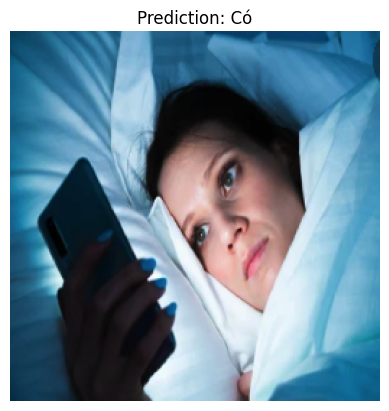

In [21]:
# prompt: Cho phép người dùng tải ảnh lên cho mô hình dự đoán

from google.colab import files
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# ... (Rest of your code) ...

def predict_uploaded_image(uploaded_file):
  """
  Predicts the class of an uploaded image using the PhoneAlert model.
  """
  try:
    img = load_img(uploaded_file, target_size=(256, 256))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0

    prediction = PhoneAlert.predict(img_array)
    result = "Có" if prediction[0][0] > 0.5 else "Không"

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {result}")
    plt.show()
  except Exception as e:
    print(f"Error processing the image: {e}")

# Allow the user to upload an image
uploaded = files.upload()

# If an image was uploaded, predict its class
for fn in uploaded.keys():
  print('Tên file: "{name}" - độ lớn: {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  predict_uploaded_image(fn)